In [188]:
import janitor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [189]:
house = pd.read_csv('house_data.csv').clean_names()

In [190]:
pd.set_option('display.max_columns', 50)
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [191]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [192]:
house['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [193]:
house['condition'] = house['condition'].replace(to_replace=[1, 2, 3, 4, 5], value=['Péssimo', 'Ruim', 'Mediano', 'Bom', 'Excelente'])

In [194]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,Mediano,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,Mediano,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,Mediano,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,Excelente,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,Mediano,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [195]:
house = pd.get_dummies(house, columns=['condition'], drop_first=True)

In [196]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,condition_Excelente,condition_Mediano,condition_Péssimo,condition_Ruim
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0,1,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0,1,0,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0,1,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1,0,0,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0,1,0,0


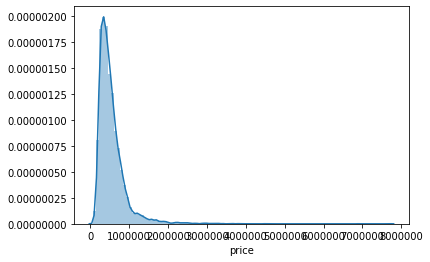

In [197]:
sns.distplot(house['price'], bins=100)

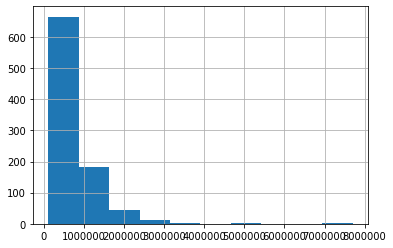

In [198]:
house[house['yr_renovated'] > 0]['price'].hist()

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [200]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'condition_Excelente',
       'condition_Mediano', 'condition_Péssimo', 'condition_Ruim'],
      dtype='object')

In [201]:
X_train, X_test, y_train, y_test = train_test_split(house.drop(['id', 'date', 'price'], axis=1),
                                                   house['price'], test_size=0.3, random_state=9)

In [202]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15129, 21), (6484, 21), (15129,), (6484,))

In [203]:
lm = LinearRegression()

In [204]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [205]:
lm.coef_, lm.intercept_

(array([-3.28792236e+04,  4.23820290e+04,  1.03797537e+02,  1.20438172e-01,
         5.02451191e+03,  5.62468585e+05,  5.48497284e+04,  9.63334995e+04,
         6.82349719e+01,  3.55625645e+01, -2.59555012e+03,  1.84539157e+01,
        -6.05176018e+02,  6.03385657e+05, -2.26014673e+05,  2.97342569e+01,
        -3.75770271e-01,  4.12948984e+04, -2.60780308e+04, -5.15295554e+04,
         2.61297678e+03]), 7557599.4029837595)

In [206]:
lm.score(X_train, y_train)

0.6940320796501502

In [207]:
y_pred = lm.predict(X_test)

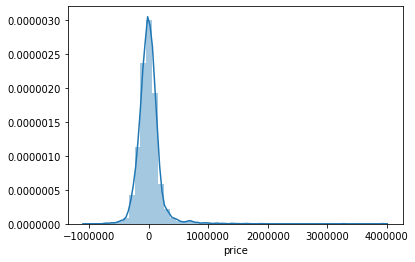

In [208]:
sns.distplot(y_test-y_pred)

In [209]:
df = pd.DataFrame()
df['test'] = y_test
df['pred'] = y_pred

In [210]:
df.head()

,test,pred
2463,262000.0,188405.813456
13901,593777.0,443709.964331
14693,405000.0,400850.869626
10530,366000.0,439995.045276
18104,361000.0,278344.075649


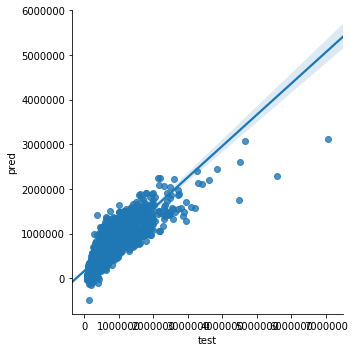

In [211]:
sns.lmplot('test', 'pred', data=df)

In [212]:
house.drop(['id', 'date', 'price'], axis=1).iloc[0]

bedrooms                   3.0000
bathrooms                  1.0000
sqft_living             1180.0000
sqft_lot                5650.0000
floors                     1.0000
waterfront                 0.0000
view                       0.0000
grade                      7.0000
sqft_above              1180.0000
sqft_basement              0.0000
yr_built                1955.0000
yr_renovated               0.0000
zipcode                98178.0000
lat                       47.5112
long                    -122.2570
sqft_living15           1340.0000
sqft_lot15              5650.0000
condition_Excelente        0.0000
condition_Mediano          1.0000
condition_Péssimo          0.0000
condition_Ruim             0.0000
Name: 0, dtype: float64

In [213]:
teste = [house.drop(['id', 'date', 'price'], axis=1).iloc[5]]

In [214]:
lm.predict(teste)

array([1450260.67328317])

In [215]:
house.head(15)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,condition_Excelente,condition_Mediano,condition_Péssimo,condition_Ruim
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0,1,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0,1,0,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0,1,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1,0,0,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0,1,0,0
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,0,1,0,0
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,0,1,0,0
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,0,1,0,0
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,0,1,0,0
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,0,1,0,0


In [216]:
result = []
for i in range(0, 15):
    result.append(((house['price'][i] - lm.predict([house.drop(['id', 'date', 'price'], axis=1).iloc[i]]).round(2))/house['price'][i])*100)

In [217]:
result

[array([7.07283461]),
 array([-33.81347026]),
 array([-117.83904444]),
 array([22.73681291]),
 array([13.74619608]),
 array([-18.38862612]),
 array([-8.33798835]),
 array([54.1511667]),
 array([-40.77715033]),
 array([22.46113003]),
 array([-28.50757132]),
 array([6.15434615]),
 array([-91.82796774]),
 array([21.10363]),
 array([-14.53303019])]

In [218]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [219]:
dt = DecisionTreeRegressor()
rf = RandomForestRegressor(n_estimators=100)

In [220]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [221]:
dt_pred = dt.predict(X_test)

In [222]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [223]:
rf_pred = rf.predict(X_test)

In [224]:
dt.score(X_train, y_train)

0.999443456005026

In [225]:
rf.score(X_train, y_train)

0.9807398603808263

In [226]:
result_lm = []
result_dt = []
result_rf = []

for i in range(0, 100):
    result_lm.append(lm.predict([house.drop(['id', 'date', 'price'], axis=1).iloc[i]]))
    result_dt.append(dt.predict([house.drop(['id', 'date', 'price'], axis=1).iloc[i]]))
    result_rf.append(rf.predict([house.drop(['id', 'date', 'price'], axis=1).iloc[i]]))

In [227]:
results = pd.DataFrame(result_lm, columns=['regressao_linear'])
results1 = pd.DataFrame(result_dt, columns=['decision_tree'])
results2 = pd.DataFrame(result_rf, columns=['random_forest'])
results3 = pd.DataFrame(y_test, columns=['real'])

In [228]:
df1 = pd.DataFrame()
df1['test'] = y_test
df1['pred'] = y_pred
df1['pred_dt'] = dt_pred
df1['pred_rf'] = rf_pred

In [229]:
df1.head()

,test,pred,pred_dt,pred_rf
2463,262000.0,188405.813456,276000.0,235488.95
13901,593777.0,443709.964331,495000.0,460167.50
14693,405000.0,400850.869626,240000.0,366701.29
10530,366000.0,439995.045276,352000.0,352184.55
18104,361000.0,278344.075649,255000.0,396282.59


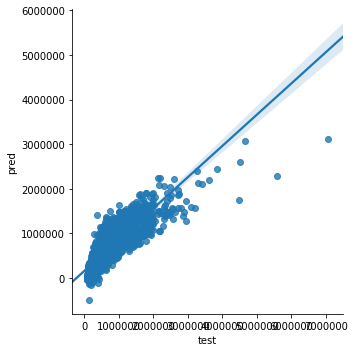

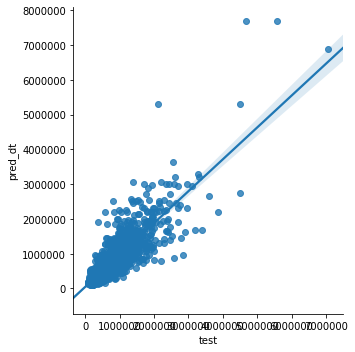

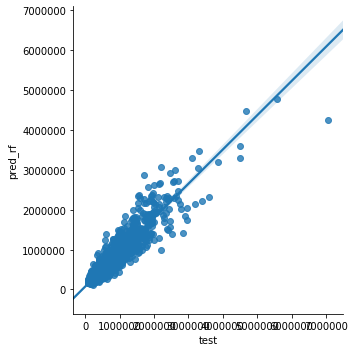

In [230]:
sns.lmplot('test', 'pred', data=df1)
sns.lmplot('test', 'pred_dt', data=df1)
sns.lmplot('test', 'pred_rf', data=df1)

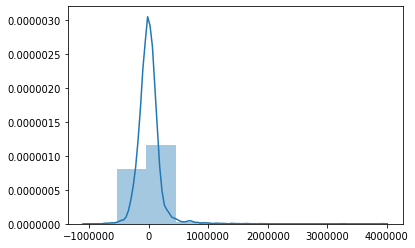

In [231]:
sns.distplot(df1['test'] - df1['pred'], bins=10)

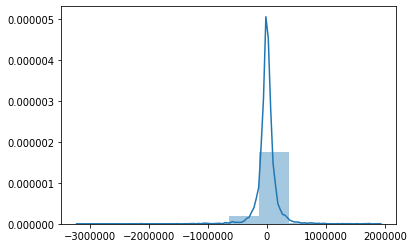

In [232]:
sns.distplot(df1['test'] - df1['pred_dt'], bins=10)

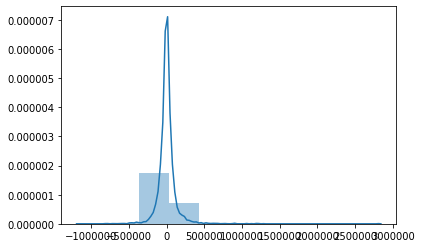

In [233]:
sns.distplot(df1['test'] - df1['pred_rf'], bins=10)

In [234]:
teste1 = [house.drop(['id', 'date', 'price'], axis=1).iloc[0]]

In [235]:
lm.predict(teste1).round(2), dt.predict(teste1), rf.predict(teste1), [house.price.iloc[0]]

(array([206205.38]), array([221900.]), array([234647.15]), [221900.0])

In [236]:
df1.reset_index_inplace()

,index,test,pred,pred_dt,pred_rf
0,2463,262000.0,1.884058e+05,276000.0,2.354890e+05
1,13901,593777.0,4.437100e+05,495000.0,4.601675e+05
2,14693,405000.0,4.008509e+05,240000.0,3.667013e+05
3,10530,366000.0,4.399950e+05,352000.0,3.521845e+05
4,18104,361000.0,2.783441e+05,255000.0,3.962826e+05
...,...,...,...,...,...
6479,8600,310000.0,1.834279e+05,310000.0,3.503423e+05
6480,13304,271000.0,2.246039e+05,346000.0,2.710763e+05
6481,3708,1350000.0,1.333801e+06,915000.0,1.209128e+06
6482,15877,282500.0,3.086299e+05,302200.0,2.939134e+05


In [237]:
df1.columns

Index(['index', 'test', 'pred', 'pred_dt', 'pred_rf'], dtype='object')

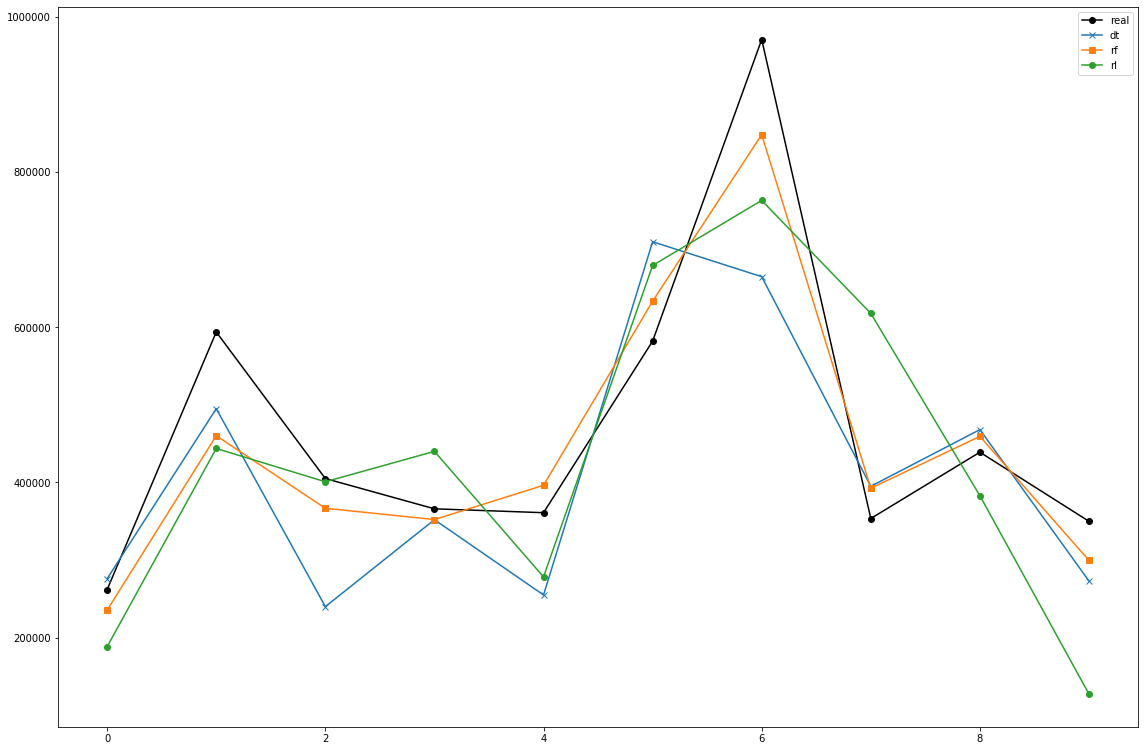

In [238]:
fig = plt.figure(figsize=(15, 10))

ax = fig.add_axes([0,0,1,1])

y = 0
x = 10

ax.plot(range(y, x), df1['test'][y:x], label="real", c='black', marker='o')
ax.plot(range(y, x), df1['pred_dt'][y:x], label="dt", marker='x')
ax.plot(range(y, x), df1['pred_rf'][y:x], label="rf", marker='s')
ax.plot(range(y, x), df1['pred'][y:x], label="rl", marker='o')

plt.legend()

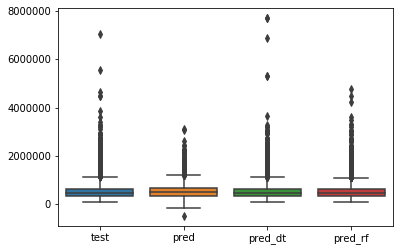

In [239]:
sns.boxplot(data=df1.drop(['index'], axis=1))

In [240]:
dt.feature_importances_

array([2.89625390e-03, 6.50697142e-03, 2.42465730e-01, 2.00825527e-02,
       1.71167173e-03, 3.20415706e-02, 1.28909400e-02, 3.52689735e-01,
       1.53995353e-02, 6.91273968e-03, 2.09606307e-02, 1.85365965e-03,
       1.38558827e-02, 1.51867961e-01, 7.77089456e-02, 2.74631966e-02,
       1.06529844e-02, 4.92608857e-04, 1.22361932e-03, 6.42065214e-05,
       2.58603351e-04])

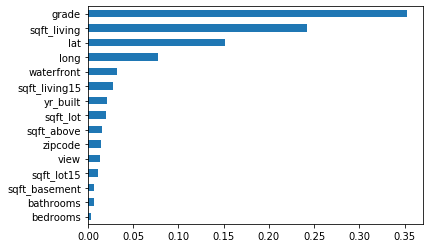

In [246]:
(pd.Series(dt.feature_importances_, index=X_test.columns)
   .nlargest(15).sort_values().plot.barh())

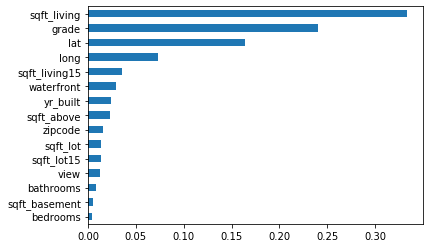

In [247]:
(pd.Series(rf.feature_importances_, index=X_test.columns)
   .nlargest(15).sort_values().plot.barh())

In [245]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,condition_Excelente,condition_Mediano,condition_Péssimo,condition_Ruim
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0,1,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0,1,0,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0,1,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1,0,0,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0,1,0,0
